# Introduction

   The goal of this project was to determine which method was the best to use with the Churn dataset. I started this project by 
using Exploratory Data Analysis with converting words to numbers and with plotting a few histograms and box plots regarding 
tenure and senior citizens. I then obtained the statistics of these histograms and box plots. I utilized the KNN Classifier, 
Random Forest, Logistic Regression, Decision Tree, and Gradient Boosting methods to obtain the cross_val_scores of the data. I 
analyzed the cross_val_scores for these methods and determined the best method to use for the Churn dataset.

# Exploratory Data Analysis

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [5]:
df = pd.read_excel (r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx')

In [6]:
# Conversion of words in the data to numbers

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 2})

df['InternetService'] = df['InternetService'].map({'DSL': 1, 'No': 0, 'Fiber optic': 2})

df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['Contract'] = df['Contract'].map({'One year': 1, 'Month-to-month': 0, 'Two year': 2})

df['PaymentMethod'] = df['PaymentMethod'].map({'Mailed check': 1, 'Electronic check': 0, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})

In [8]:
df = pd.read_excel (r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [12]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()*100/df.isnull().count()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

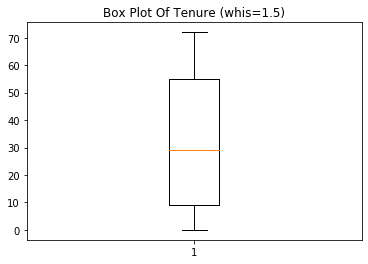

In [14]:
# Box plot for tenure category (whis=1.5)

plt.boxplot(df["tenure"])
plt.title("Box Plot Of Tenure (whis=1.5)")
plt.show()

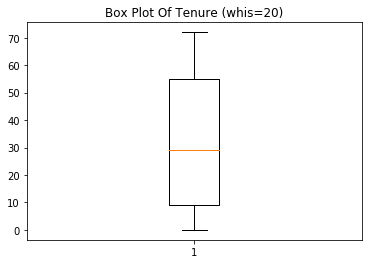

In [15]:
# Box plot for tenure category (whis=20)

plt.boxplot(df["tenure"], whis=20)
plt.title("Box Plot Of Tenure (whis=20)")
plt.show()

In [16]:
df["tenure"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

The median of the two tenure box plots above is 29 dollars, the 25th percentile is 9 dollars, the 75th percentile is 55 dollars, the maximum is 72 dollars, and the minimum is 0 dollars.

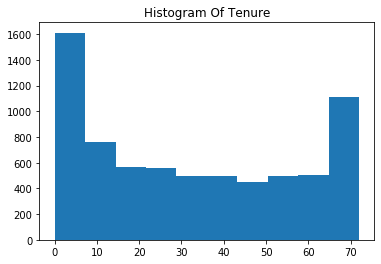

In [17]:
# Histogram for tenure category

plt.hist(df["tenure"])
plt.title("Histogram Of Tenure")
plt.show()

Approximately half of the customers have tenures between about 15 and 65 dollars, a little over a third of the customers have tenures between 0 and 14 dollars, approximately 15% of the customers have tenures that are between 66 and 72 dollars.

In [18]:
# The score thresholds, the indices of the outliers, and the numbers of outliers of the tenure category

from scipy.stats import zscore

z_scores = zscore(df["tenure"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([   9,   12,   15, ..., 7037, 7039, 7042], dtype=int64),)
Number of outliers is: 1675
The score threshold is: 2
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 3
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 4
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0


In [19]:
# The score thresholds and the numbers of outliers of the tenure category

q75, q25 = np.percentile(df["tenure"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df["tenure"] > max_val) 
                      | (df["tenure"] < min_val))[0]))))

The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [20]:
# Winsorization of the tenure category

from scipy.stats.mstats import winsorize

winsorized_views = winsorize(df["tenure"], (0, 0.10))

winsorized_views

masked_array(data=[ 1, 34,  2, ..., 11,  4, 66],
             mask=False,
       fill_value=999999,
            dtype=int64)

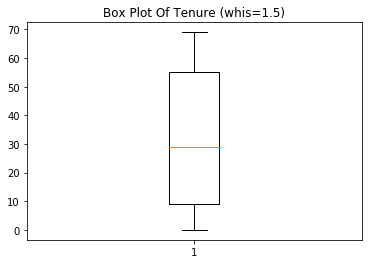

In [21]:
# Box plot for the tenure category

plt.boxplot(winsorized_views)
plt.title("Box Plot Of Tenure (whis=1.5)")
plt.show()

In [22]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

The median of the tenure box plot is 29 dollars, the 25th percentile is 9 dollars, the 75th percentile is 55 dollars, the maximum is 72 dollars, and the minimum is 0 dollars.

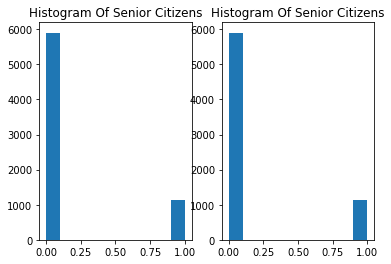

In [23]:
# Two histograms regarding senior citizens and churn

plt.subplot(1,2,1)
plt.hist(df["SeniorCitizen"])
plt.title("Histogram Of Senior Citizens")

plt.subplot(1,2,2)
plt.hist(df["SeniorCitizen"])
plt.title("Histogram Of Senior Citizens")
plt.show()

The histograms here reveal that approximately 85% of the senior citizen customers will stay with the services while approximately 15% of the senior citizen customers will not stay with the services.

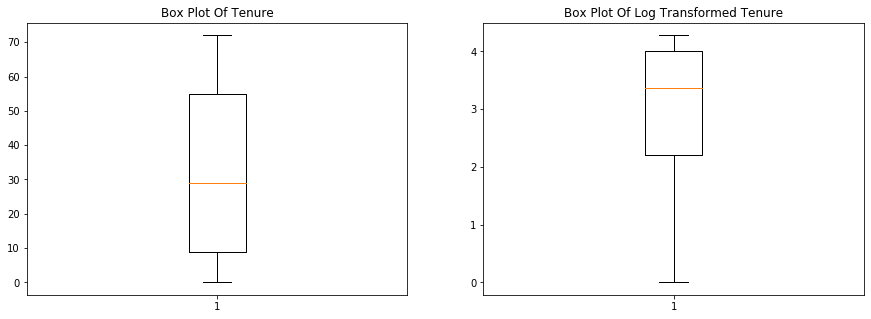

In [24]:
# Box plots of tenure and log transformed tenure

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(df["tenure"])
plt.title("Box Plot Of Tenure")

plt.subplot(1,2,2)
plt.boxplot(np.log(df["tenure"]))
plt.title("Box Plot Of Log Transformed Tenure")
plt.show()

In [25]:
df["tenure"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [26]:
np.log(df["tenure"]).describe()

count    7043.000000
mean            -inf
std              NaN
min             -inf
25%         2.197225
50%         3.367296
75%         4.007333
max         4.276666
Name: tenure, dtype: float64

The median of the tenure box plot is 29 dollars, the maximum is 72 dollars, the minimum is 0 dollars, the 25th percentile is 
2.197225 dollars, and the 75th percentile is 4.007333 dollars. The median of the log transformed tenure box plot is 3.367296 
dollars, the maximum is 4.276666 dollars, the minimum is negative infinity, the 25th percentile is 2.197225, and the 75th 
percentile is 4.007333.

In [27]:
# The score thresholds and the numbers of outliers of the log transformed tenure category

q75, q25 = np.percentile(np.log(df["tenure"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(df["tenure"]) > max_val) 
                      | (np.log(df["tenure"]) < min_val))[0]))))

The score threshold is: 1.0
Number of outliers is: 624
The score threshold is: 1.5
Number of outliers is: 11
The score threshold is: 2.0
Number of outliers is: 11
The score threshold is: 2.5
Number of outliers is: 11
The score threshold is: 3.0
Number of outliers is: 11
The score threshold is: 3.5
Number of outliers is: 11
The score threshold is: 4.0
Number of outliers is: 11
The score threshold is: 4.5
Number of outliers is: 11


# Gradient Boosting

In [29]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
%matplotlib inline

In [30]:
# Conversion of words in the data to numbers

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 2})

df['InternetService'] = df['InternetService'].map({'DSL': 1, 'No': 0, 'Fiber optic': 2})

df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['Contract'] = df['Contract'].map({'One year': 1, 'Month-to-month': 0, 'Two year': 2})

df['PaymentMethod'] = df['PaymentMethod'].map({'Mailed check': 1, 'Electronic check': 0, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})

In [31]:
# Dropping the categories of churn, customerIDs, and total charges for X

Y = df['Churn']
X = df.drop(columns=['Churn','customerID','TotalCharges'])
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85
3,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70


In [32]:
# Obtaining the cross_val_scores of Gradient Boosting

from sklearn import datasets, linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
classifier = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0)
print(cross_val_score(classifier, X, Y, cv=5))

[0.79985806 0.78992193 0.76863023 0.78992193 0.79175551]


Gradient Boosting yields the second highest cross_val_scores for the Churn dataset.

# Random Forest

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# Obtaining the cross_val_scores of Random Forest

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(max_depth=2, max_features=3)
print(cross_val_score(random_forest, X, Y, cv=5))

[0.7430802  0.78353442 0.73456352 0.76224273 0.77469794]


Random Forest yields the fourth highest cross_val_Scors for the Churn dataset.

# Logistic Regression

In [35]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [36]:
# Obtaining the cross_val_scores of Logistic Regression

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, Y)
print(cross_val_score(clf, X, Y, cv=5))

[0.80695529 0.8133428  0.78424414 0.80695529 0.80525942]


Logistic Regression yields the highest cross_val_scores for the Churn dataset.

# Decision Tree

In [37]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# Obtaining the cross_val_scores of Decision Tree

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()
print(cross_val_score(clf, X, Y, cv=5))

[0.72888573 0.72107878 0.71611072 0.71682044 0.72850036]


Decision Tree yields the fifth highest cross_val_scores for the Churn dataset.

# KNN Classifier

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [40]:
# Obtaining the cross_val_scores of Decision Tree

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
print(cross_val_score(knn, X, Y, cv=5))

[0.77430802 0.79276082 0.76366217 0.77217885 0.77327647]


KNN Classifier yields the third highest cross_val_scores for the Churn dataset.

# Summary

   I started this project with the intention of determining whether Gradient Boosting, Random Forest, Logistic Regression, Decision Tree, or KNN Classifier was the best method to use with the Churn dataset. To do this, I did the Data Exploratory Analysis by plotting the box plots and histograms for tenure and senior citizens. I then recorded the statistics of the box plots and histograms. I also winsorized the tenure category, and I obtained the score thresholds, the indices of the outliers, and the numbers of outliers of the tenure category. For the tenure histogram, approximately half of the customers have tenures between about 15 and 65 dollars, a little over a third of the customers have tenures between 0 and 14 dollars, and approximately 15% of the customers have tenures that are between 66 and 72 dollars. The median of the two tenure box plots above is 29 dollars, the 25th percentile is 9 dollars, the 75th percentile is 55 dollars, the maximum is 72 dollars, and the minimum is 0 dollars; therefore, the tenure histogram and the two tenure box plots match closely with each other. 
   After that, I used the five methods listed above to determine what the cross_val_scores were. I discovered that Logistic Regression was the best method to use because the absolute values of the cross_val_scores of this method were about 0.807, 0.813, 0.784, 0.807, and 0.805. Gradient Boosting was the second best method to use because the absolute values of the cross_val_scores were at about 0.800, 0.790, 0.769, 0.790, and 0.792; and KNN Classifier was the third best method to use because the absolute values of the cross_val_scores were at about 0.774, 0.793, 0.764, 0.772, and 0.773. Random Forest was the fourth best method to use because because the absolute values of the cross_val_scores were at about 0.762, 0.765, 0.769, 0.765, and 0.775; and Decision Tree was the fifth best method to use because the absolute values of the cross_val_scores were at about 0.732, 0.718, 0.718, 0.712, and 0.732. These were the results of my project regarding the Churn dataset.